# Classifying prompt vs. fake photons from $t\bar{t}$, $t\bar{t}+\gamma$ events

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [3]:
# import tensorflow as tf
from keras.models import save_model
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

## Load data

In [4]:
from coffea import hist, util
from coffea.util import load

In [5]:
outputMC = load('outputMC.coffea')
outputData = load('outputData.coffea')

## Plot Features

In [6]:
np.warnings.filterwarnings('ignore')

In [7]:
data_err_opts = {
    'linestyle':'none',
    'marker': '.',
    'markersize': 10.,
    'color':'k',
    'elinewidth': 1}

data_legopts = {'labels':[None,'prompt electron (13)','prompt photon (1)','fake photon (0)','data, $L = 5780~{pb}^{-1}$']}

rat_denom_opts = {}

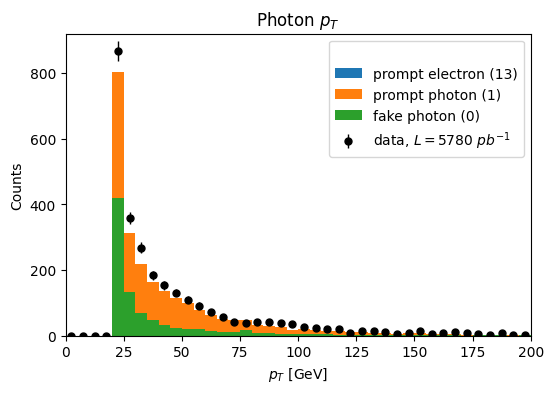

In [8]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['photon_pt_hist'].sum("dataset"),overlay="flav",stack=True,legend_opts=data_legopts)
hist.plot1d(outputData['photon_pt_hist'],error_opts=data_err_opts,legend_opts=data_legopts)
plt.ylim(0,920); plt.title('Photon $p_T$'); plt.show()

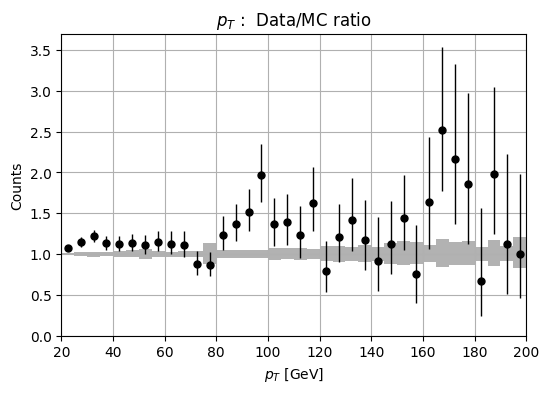

In [9]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['photon_pt_hist'],outputMC['photon_pt_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('$p_T$ :  Data/MC ratio'); plt.grid()
plt.show()

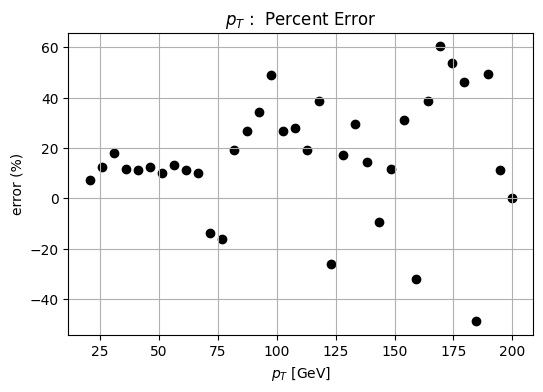

In [10]:
# statistical uncertainty
residual = outputData['photon_pt_hist'].values()[()] - outputMC['photon_pt_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['photon_pt_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(0,200,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('$p_T$ [GeV]'); plt.ylabel('error (%)'); plt.title('$p_T$ :  Percent Error'); plt.grid()
plt.show()

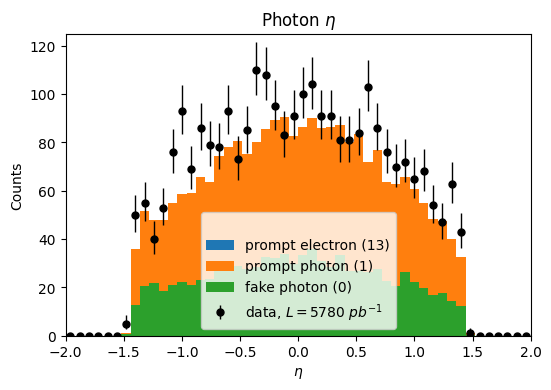

In [11]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['photon_eta_hist'].sum("dataset"),overlay="flav",stack=True,legend_opts=data_legopts)
hist.plot1d(outputData['photon_eta_hist'],legend_opts=data_legopts,error_opts=data_err_opts)
plt.ylim(0,125); plt.title('Photon $\eta$'); plt.show()

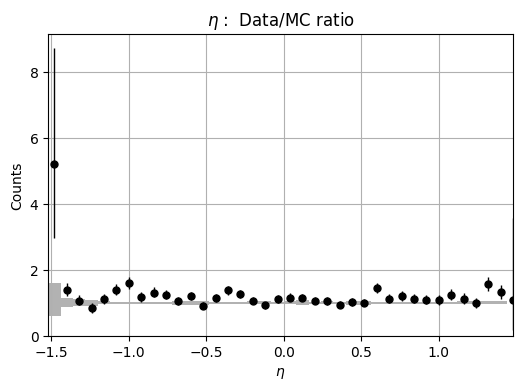

In [12]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['photon_eta_hist'],outputMC['photon_eta_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('$\eta$ :  Data/MC ratio'); plt.grid()
plt.show()

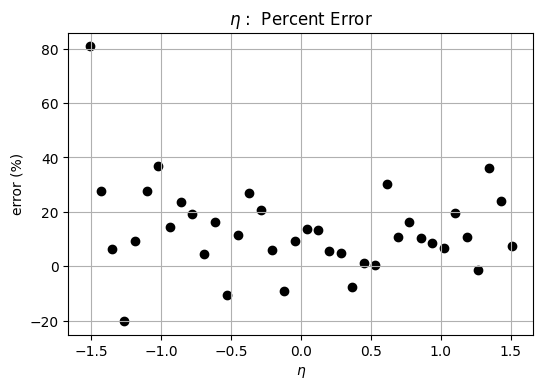

In [13]:
# statistical uncertainty
residual = outputData['photon_eta_hist'].values()[()] - outputMC['photon_eta_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['photon_eta_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(-2, 2,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('$\eta$'); plt.ylabel('error (%)'); plt.title('$\eta$ :  Percent Error'); plt.grid()
plt.show()

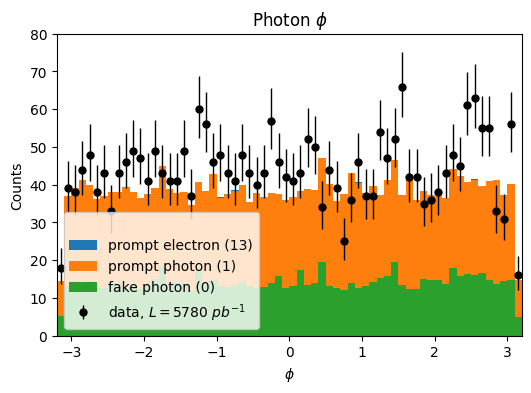

In [14]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['photon_phi_hist'].sum("dataset"),overlay="flav",stack=True,legend_opts=data_legopts)
hist.plot1d(outputData['photon_phi_hist'],error_opts=data_err_opts,legend_opts=data_legopts)
plt.ylim(0,80); plt.title('Photon $\phi$'); plt.show()

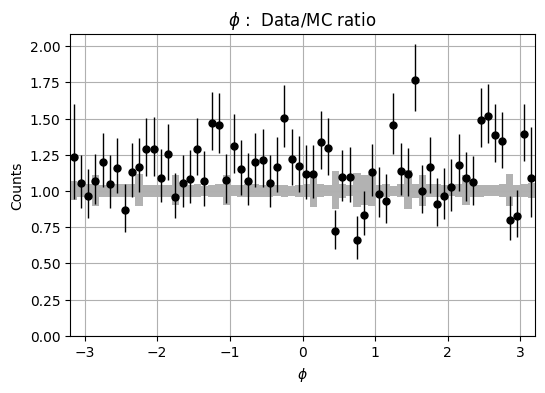

In [15]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['photon_phi_hist'],outputMC['photon_phi_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('$\phi$ :  Data/MC ratio'); plt.grid()
plt.show()

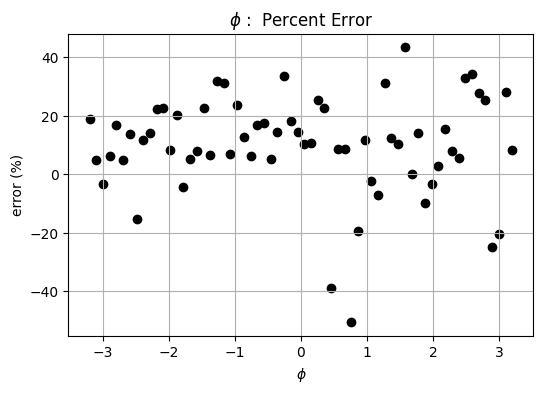

In [16]:
# statistical uncertainty
residual = outputData['photon_phi_hist'].values()[()] - outputMC['photon_phi_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['photon_phi_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(-3.2, 3.2,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('$\phi$'); plt.ylabel('error (%)'); plt.title('$\phi$ :  Percent Error'); plt.grid()
plt.show()

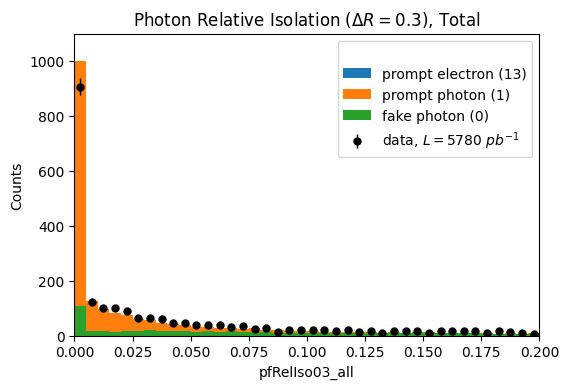

In [17]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['photon_reliso_all_hist'].sum("dataset"),overlay="flav",stack=True,legend_opts=data_legopts)
hist.plot1d(outputData['photon_reliso_all_hist'],error_opts=data_err_opts,legend_opts=data_legopts)
plt.ylim(0,1100); plt.title('Photon Relative Isolation ($\Delta R = 0.3$), Total'); plt.show()

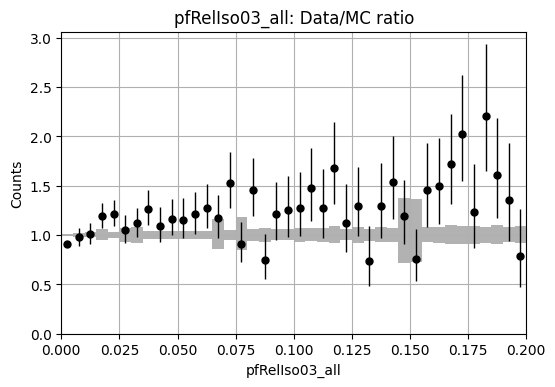

In [18]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['photon_reliso_all_hist'],outputMC['photon_reliso_all_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('pfRelIso03_all: Data/MC ratio'); plt.grid()
plt.show()

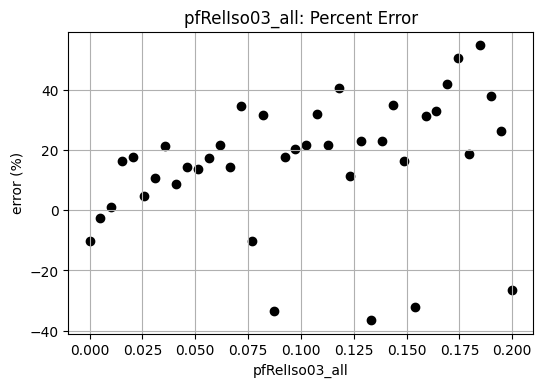

In [19]:
# statistical uncertainty
residual = outputData['photon_reliso_all_hist'].values()[()] - outputMC['photon_reliso_all_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['photon_reliso_all_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(0, 0.2,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('pfRelIso03_all'); plt.ylabel('error (%)'); plt.title('pfRelIso03_all: Percent Error'); plt.grid()
plt.show()

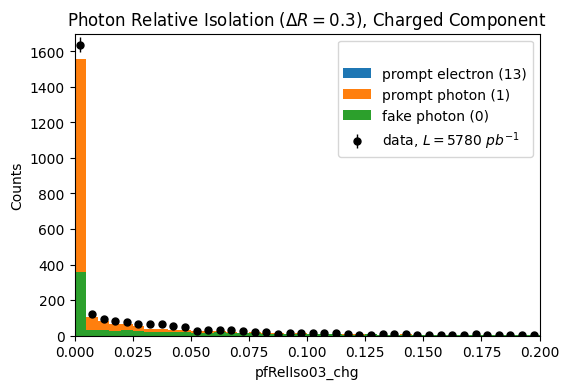

In [20]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['photon_reliso_chg_hist'].sum("dataset"),overlay="flav",stack=True,legend_opts=data_legopts)
hist.plot1d(outputData['photon_reliso_chg_hist'],error_opts=data_err_opts,legend_opts=data_legopts)
plt.ylim(0,1700); plt.title('Photon Relative Isolation ($\Delta R = 0.3$), Charged Component'); plt.show()

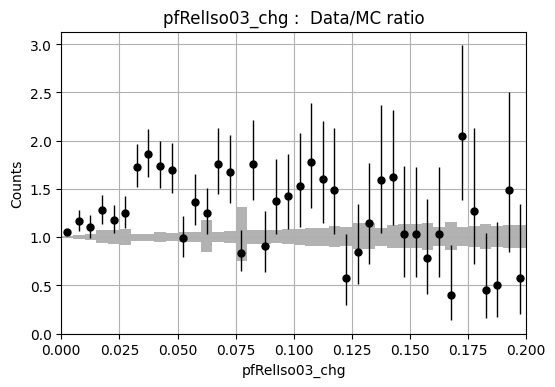

In [21]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['photon_reliso_chg_hist'],outputMC['photon_reliso_chg_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('pfRelIso03_chg :  Data/MC ratio'); plt.grid()
plt.show()

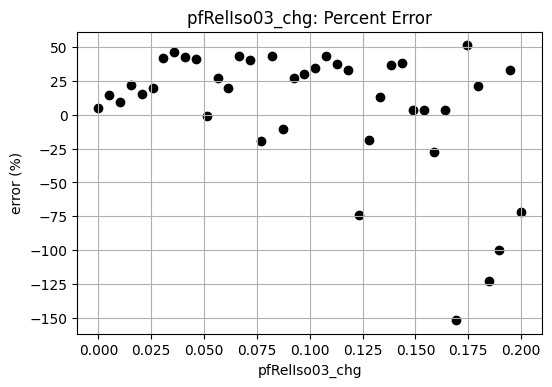

In [22]:
# statistical uncertainty
residual = outputData['photon_reliso_chg_hist'].values()[()] - outputMC['photon_reliso_chg_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['photon_reliso_chg_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(0, 0.2,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('pfRelIso03_chg'); plt.ylabel('error (%)'); plt.title('pfRelIso03_chg: Percent Error'); plt.grid()
plt.show()

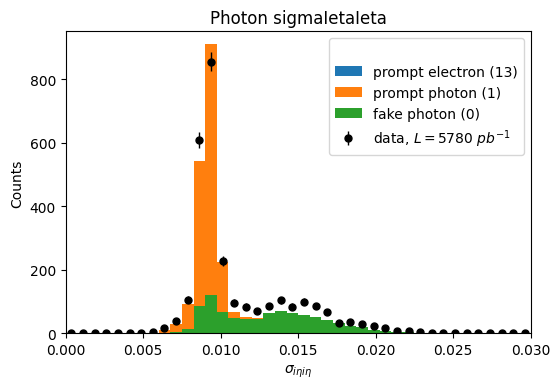

In [23]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['photon_sieie_hist'].sum("dataset"),overlay="flav",stack=True,legend_opts=data_legopts,)
hist.plot1d(outputData['photon_sieie_hist'],legend_opts=data_legopts,error_opts=data_err_opts)
plt.ylim(0,950); plt.title('Photon sigmaIetaIeta'); plt.show()

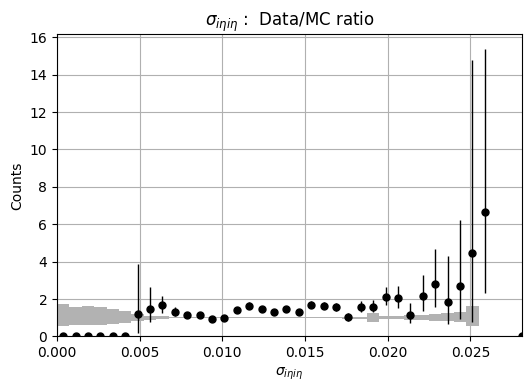

In [24]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['photon_sieie_hist'],outputMC['photon_sieie_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('$\sigma_{i\eta i\eta}$ :  Data/MC ratio'); plt.grid()
plt.show()

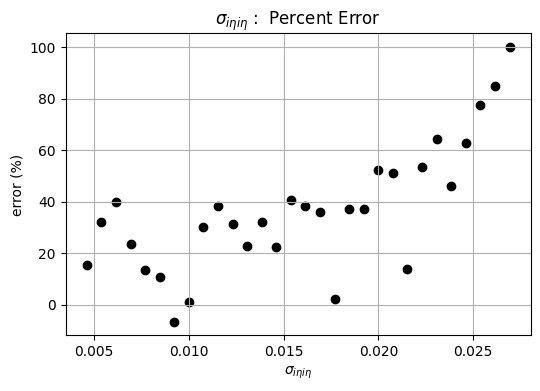

In [25]:
# statistical uncertainty
residual = outputData['photon_sieie_hist'].values()[()] - outputMC['photon_sieie_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['photon_sieie_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(0, 0.03,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('$\sigma_{i\eta i\eta}$'); plt.ylabel('error (%)'); plt.title('$\sigma_{i\eta i\eta}$ :  Percent Error'); plt.grid()
plt.show()

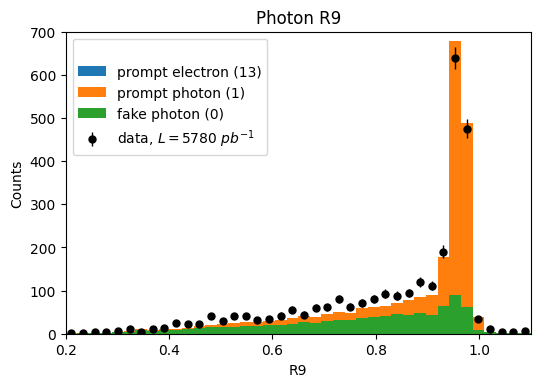

In [26]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['photon_r9_hist'].sum("dataset"),overlay="flav",stack=True,legend_opts=data_legopts)
hist.plot1d(outputData['photon_r9_hist'],error_opts=data_err_opts,legend_opts=data_legopts)
plt.ylim(0,700); plt.title('Photon R9'); plt.show()

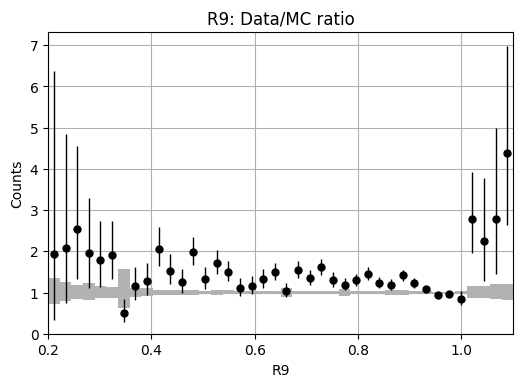

In [27]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['photon_r9_hist'],outputMC['photon_r9_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('R9: Data/MC ratio'); plt.grid()
plt.show()

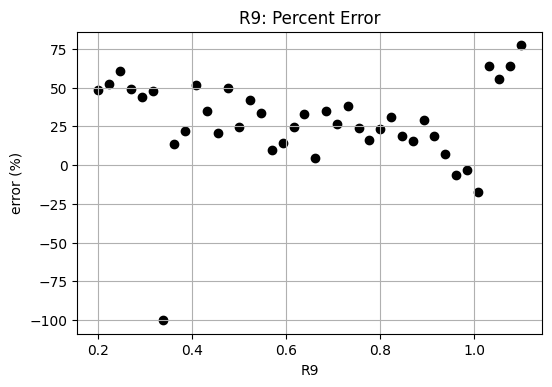

In [28]:
# statistical uncertainty
residual = outputData['photon_r9_hist'].values()[()] - outputMC['photon_r9_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['photon_r9_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(0.2, 1.1,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('R9'); plt.ylabel('error (%)'); plt.title('R9: Percent Error'); plt.grid()
plt.show()

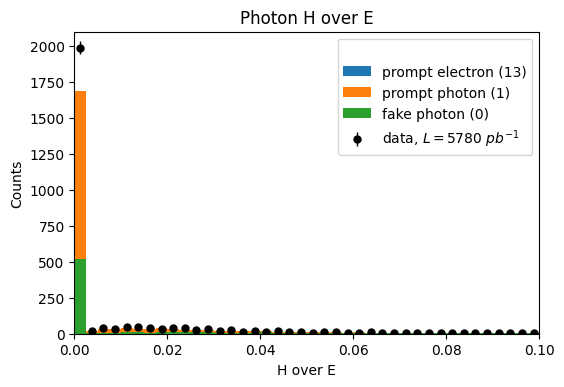

In [29]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['photon_hoe_hist'].sum("dataset"),overlay="flav",stack=True,legend_opts=data_legopts)
hist.plot1d(outputData['photon_hoe_hist'],legend_opts=data_legopts,error_opts=data_err_opts)
plt.ylim(0,2100); plt.title('Photon H over E'); plt.show()

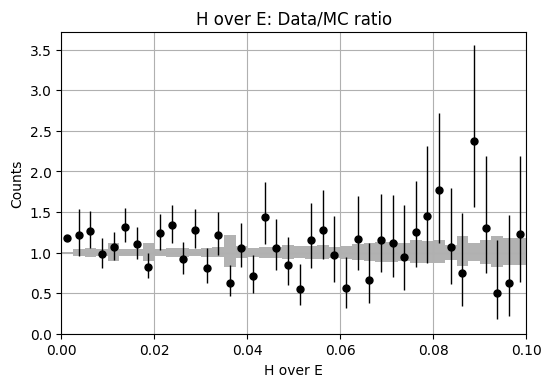

In [30]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['photon_hoe_hist'],outputMC['photon_hoe_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('H over E: Data/MC ratio'); plt.grid()
plt.show()

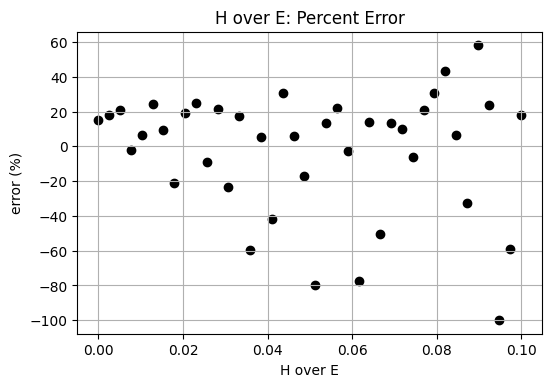

In [31]:
# statistical uncertainty
residual = outputData['photon_hoe_hist'].values()[()] - outputMC['photon_hoe_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['photon_hoe_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(0,0.1,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('H over E'); plt.ylabel('error (%)'); plt.title('H over E: Percent Error'); plt.grid()
plt.show()

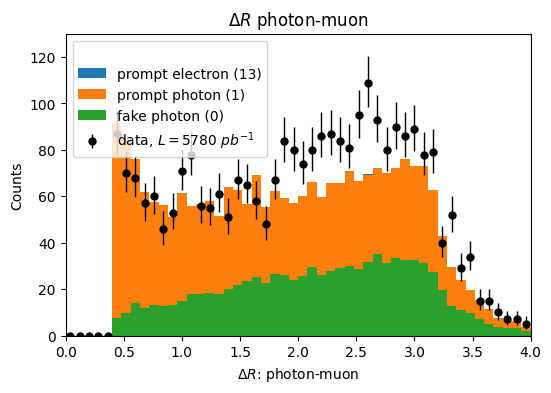

In [32]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['deltaR_photon_lepton_hist'].sum("dataset"),overlay="flav",stack=True,legend_opts=data_legopts)
hist.plot1d(outputData['deltaR_photon_lepton_hist'],legend_opts=data_legopts,error_opts=data_err_opts)
plt.ylim(0,130); plt.title('$\Delta R$ photon-muon'); plt.show()

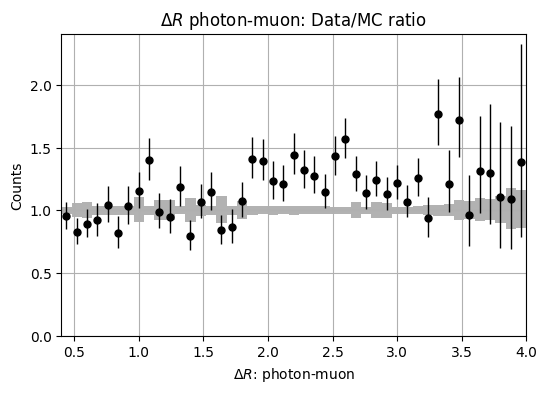

In [33]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['deltaR_photon_lepton_hist'],outputMC['deltaR_photon_lepton_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('$\Delta R$ photon-muon: Data/MC ratio'); plt.grid()
plt.show()

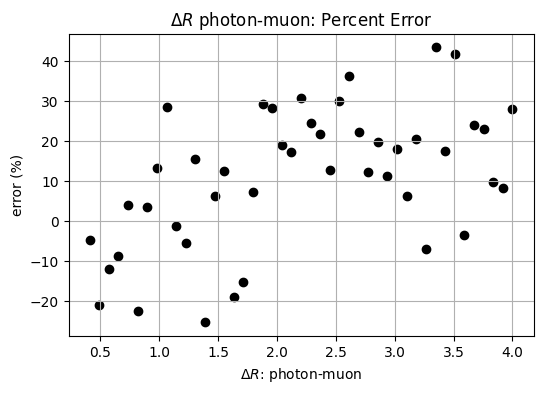

In [34]:
# statistical uncertainty
residual = outputData['deltaR_photon_lepton_hist'].values()[()] - outputMC['deltaR_photon_lepton_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['deltaR_photon_lepton_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(0,4,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('$\Delta R$: photon-muon'); plt.ylabel('error (%)'); plt.title('$\Delta R$ photon-muon: Percent Error'); plt.grid()
plt.show()

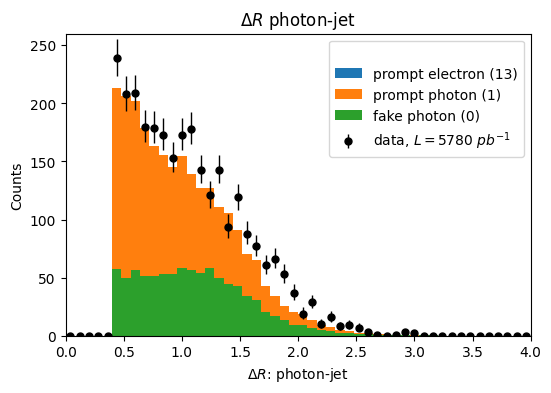

In [35]:
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['deltaR_photon_jet_hist'].sum('dataset'),overlay="flav",stack=True,legend_opts=data_legopts)
hist.plot1d(outputData['deltaR_photon_jet_hist'],error_opts=data_err_opts,legend_opts=data_legopts)
plt.ylim(0,260); plt.title('$\Delta R$ photon-jet'); plt.show()

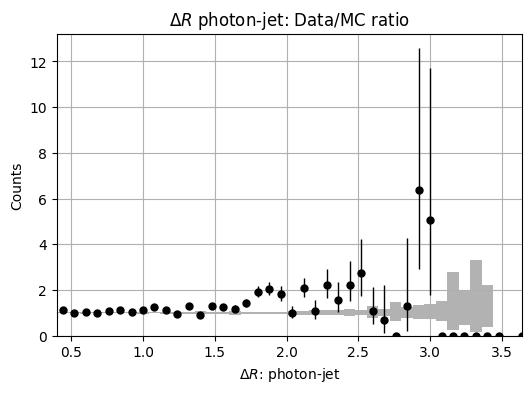

In [36]:
plt.figure(figsize=(6,4),dpi=100); ax1 = plt.subplot(1, 1, 1)
hist.plotratio(outputData['deltaR_photon_jet_hist'],outputMC['deltaR_photon_jet_hist'].sum('dataset').sum('flav'),unc='num',ax=ax1,error_opts=data_err_opts,denom_fill_opts=rat_denom_opts)
plt.title('$\Delta R$ photon-jet: Data/MC ratio'); plt.grid()
plt.show()

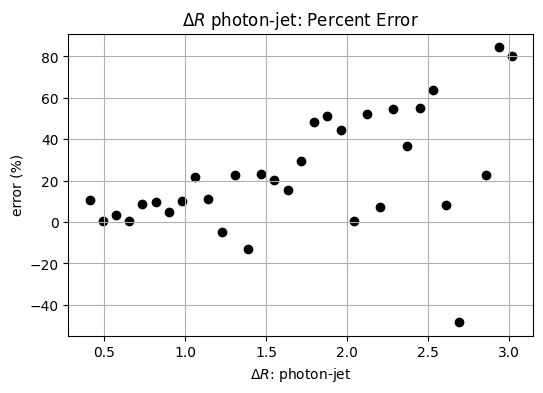

In [37]:
# statistical uncertainty
residual = outputData['deltaR_photon_jet_hist'].values()[()] - outputMC['deltaR_photon_jet_hist'].sum('dataset').sum('flav').values()[()]
relErr = 100*residual/outputData['deltaR_photon_jet_hist'].values()[()]

plt.figure(figsize=(6,4),dpi=100)
plt.scatter(np.linspace(0,4,relErr.shape[0]),relErr, marker='o',c='k')
plt.xlabel('$\Delta R$: photon-jet'); plt.ylabel('error (%)'); plt.title('$\Delta R$ photon-jet: Percent Error'); plt.grid()
plt.show()

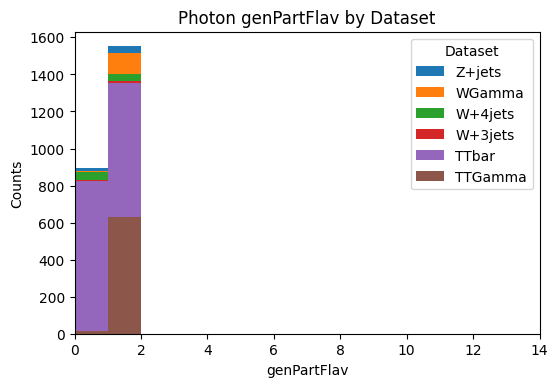

In [38]:
### label ###
plt.figure(figsize=(6,4),dpi=100)
hist.plot1d(outputMC['photon_genPartFlav_hist'],overlay='dataset',stack=True)
plt.title("Photon genPartFlav by Dataset")
plt.show()

## Preprocess data for training

In [39]:
df = pd.DataFrame({
    'photon_pt': np.array(outputMC['photon_pt'].value),
    'photon_eta': np.array(outputMC['photon_eta'].value),
    'photon_phi': np.array(outputMC['photon_phi'].value),
    'photon_hoe': np.array(outputMC['photon_hoe'].value),
    'photon_r9': np.array(outputMC['photon_r9'].value),
    'photon_sieie': np.array(outputMC['photon_sieie'].value),
    'photon_pfRelIso03_all': np.array(outputMC['photon_pfRelIso03_all'].value),
    'photon_pfRelIso03_chg': np.array(outputMC['photon_pfRelIso03_chg'].value),
    'deltaR_photon_lepton': np.array(outputMC['deltaR_photon_lepton'].value),
    'deltaR_photon_jet': np.array(outputMC['deltaR_photon_jet'].value),
    
    # Removed from X_train before training:
    'photon_mvaID': np.array(outputMC['photon_mvaid'].value),
    'file': np.array(outputMC['file'].value),
    
    'photon_genPartFlav': np.array(outputMC['photon_genPartFlav'].value), ## TARGET ##
})

df.describe()

,photon_pt,photon_eta,photon_phi,photon_hoe,photon_r9,photon_sieie,photon_pfRelIso03_all,photon_pfRelIso03_chg,deltaR_photon_lepton,deltaR_photon_jet,photon_mvaID,file,photon_genPartFlav
count,199308.000000,199308.000000,199308.000000,199308.000000,199308.000000,199308.000000,199308.000000,199308.000000,199308.000000,199308.000000,199308.000000,199308.000000,199308.000000
mean,57.537060,0.006971,0.011501,0.011620,0.894946,0.009566,0.049870,0.014907,1.881212,0.985969,0.674680,0.824202,0.890431
std,56.189671,0.730159,1.813793,0.037462,0.152362,0.001806,0.222336,0.058664,0.925499,0.442571,0.563186,0.387650,0.347916
min,20.000051,-1.444092,-3.141602,0.000000,0.134155,0.000196,0.000000,0.000000,0.400002,0.400008,-0.999512,0.000000,0.000000
25%,25.090697,-0.569580,-1.556396,0.000000,0.885254,0.008865,0.000000,0.000000,1.040378,0.622247,0.731445,1.000000,1.000000
50%,38.344942,0.011635,0.006489,0.000000,0.953613,0.009209,0.003541,0.000000,1.909012,0.900718,0.935547,1.000000,1.000000
75%,65.709021,0.584015,1.584961,0.006393,0.965332,0.009598,0.029892,0.006597,2.672652,1.261720,0.979492,1.000000,1.000000
max,1116.671387,1.444092,3.141602,0.499023,14.968750,0.028076,18.950638,8.643118,4.776289,3.610590,0.998535,2.000000,13.000000


In [40]:
df['photon_genPartFlav'].value_counts()

1     177080
0      22198
13        30
Name: photon_genPartFlav, dtype: int64

In [41]:
# relabel 13 (=prompt electrons) as 0
df['photon_genPartFlav'] = df['photon_genPartFlav'].replace(13,0)
df['photon_genPartFlav'].value_counts()

1    177080
0     22228
Name: photon_genPartFlav, dtype: int64

In [42]:
### shuffle & split into train, val, test datasets ###

X = df.drop(['photon_genPartFlav'],axis=1)
y = df['photon_genPartFlav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [43]:
### remove MVA ID and file features ###

test_mvaID = X_test['photon_mvaID']

X_train = X_train.drop(['photon_mvaID'],axis=1).drop(['file'],axis=1)
X_test = X_test.drop(['photon_mvaID'],axis=1).drop(['file'],axis=1)
X_val = X_val.drop(['photon_mvaID'],axis=1).drop(['file'],axis=1)

In [44]:
### Scale: mean=0, stdev=1 ###

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

## Build & train model

In [45]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [46]:
callback = EarlyStopping(monitor='val_loss', patience=4)

history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, batch_size=512, callbacks=[callback])


Epoch 1/100
234/234 [==============================] - 1s 3ms/step - loss: 0.2486 - accuracy: 0.9117 - val_loss: 0.1383 - val_accuracy: 0.9569
Epoch 2/100
234/234 [==============================] - 1s 2ms/step - loss: 0.1343 - accuracy: 0.9574 - val_loss: 0.1306 - val_accuracy: 0.9583
Epoch 3/100
234/234 [==============================] - 1s 2ms/step - loss: 0.1282 - accuracy: 0.9590 - val_loss: 0.1266 - val_accuracy: 0.9593
Epoch 4/100
234/234 [==============================] - 1s 2ms/step - loss: 0.1254 - accuracy: 0.9596 - val_loss: 0.1248 - val_accuracy: 0.9599
Epoch 5/100
234/234 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.9599 - val_loss: 0.1239 - val_accuracy: 0.9595
Epoch 6/100
234/234 [==============================] - 1s 2ms/step - loss: 0.1223 - accuracy: 0.9599 - val_loss: 0.1227 - val_accuracy: 0.9605
Epoch 7/100
234/234 [==============================] - 1s 2ms/step - loss: 0.1215 - accuracy: 0.9602 - val_loss: 0.1227 - val_accuracy: 0.9605

In [47]:
# save model:
path = !pwd
save_model(model, path[0])

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /udrive/student/abraukman2020/PhotonClassification/assets


In [48]:
print("Weights and biases of the layers after training the model: \n")
for layer in model.layers:
    print(layer.name)
    print("Weights")
    print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
    print("Bias")
    print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

Weights and biases of the layers after training the model: 

dense
Weights
Shape:  (10, 32) 
 [[ 2.54134182e-03  1.29024461e-01  1.08278422e-02  4.46976602e-01
  -4.06585857e-02 -1.08518653e-01 -4.29871023e-01  9.37140584e-02
   2.23273605e-01  2.63999015e-01  2.58940965e-01  6.74319565e-01
  -2.56963015e-01 -1.78406715e-01  1.42580345e-01  3.85067239e-02
  -5.39228082e-01 -2.90685326e-01  3.09400797e-01  5.48485406e-02
   3.30770940e-01  5.11824012e-01 -4.67702299e-01  5.70788443e-01
  -1.05609477e-01 -2.31599599e-01  2.85022259e-01  7.08769113e-02
   1.47134677e-01  3.81133556e-01  4.30209726e-01  4.15482670e-02]
 [ 7.14078024e-02 -2.51541793e-01 -1.02562457e-02 -4.40362245e-01
  -4.98547517e-02 -5.33179827e-02  1.32742986e-01  1.27836794e-01
   2.56577283e-02 -4.30657305e-02  9.97280888e-03  8.75554804e-04
  -1.28504083e-01  2.88921952e-01 -2.62943327e-01 -2.06756338e-01
  -1.07662119e-01  1.57655254e-01  1.78782701e-01  4.42871265e-02
   1.14839584e-01  4.02119219e-01 -7.88907558e-

## Evaluate Model

In [49]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test loss: {round(loss,5)}\nTest accuracy: {round(accuracy,5)}')

Test loss: 0.12416
Test accuracy: 0.96044


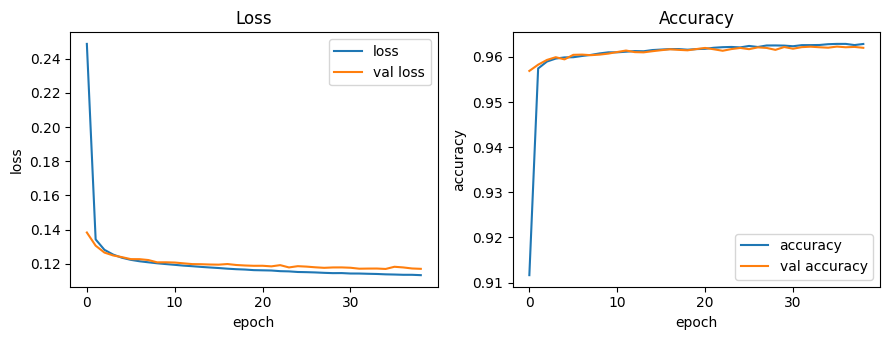

In [50]:
fig, axs = plt.subplots(1,2,figsize=(9,3.5),dpi=100)

axs[0].plot(history.history['loss'],label="loss")
axs[0].plot(history.history['val_loss'],label="val loss")
axs[1].plot(history.history['accuracy'],label="accuracy")
axs[1].plot(history.history['val_accuracy'],label="val accuracy")

axs[0].set_xlabel('epoch'); axs[0].set_ylabel('loss'); axs[0].set_title('Loss')
axs[1].set_xlabel('epoch'); axs[1].set_ylabel('accuracy'); axs[1].set_title('Accuracy')
axs[0].legend(); axs[1].legend()

plt.tight_layout()
plt.show()

### ROC Curve

In [51]:
y_pred = model.predict(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
area_under_curve = auc(fpr, tpr)

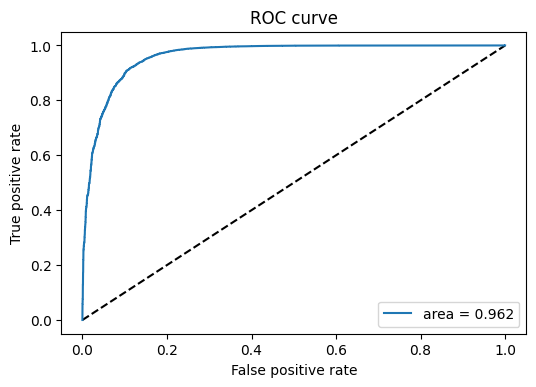

In [52]:
plt.figure(figsize=(6,4),dpi=100)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='area = {:.3f}'.format(area_under_curve))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Fill Prediction Histograms

This should happen in another Coffea Processor, but I'm having issues referencing `model` inside a processor

In [53]:
pred_axis = hist.Bin("pred", "Prediction", 30,0,1)
flavLabel_axis = hist.Bin("flav",None,[0,1,2])
dataset_axis = hist.Cat('dataset','Dataset')

outputMC['pred_hist'] = hist.Hist("Counts", dataset_axis, pred_axis, flavLabel_axis)

In [54]:
### flavLabel_axis ###

flavLabel = outputMC['photon_genPartFlav'].value
flavLabel[flavLabel==13] = 0
print(flavLabel.max())

1


In [55]:
### pred_axis ###

df_MC = pd.DataFrame({
    'photon_pt': np.array(outputMC['photon_pt'].value),
    'photon_eta': np.array(outputMC['photon_eta'].value),
    'photon_phi': np.array(outputMC['photon_phi'].value),
    'photon_hoe': np.array(outputMC['photon_hoe'].value),
    'photon_r9': np.array(outputMC['photon_r9'].value),
    'photon_sieie': np.array(outputMC['photon_sieie'].value),
    'photon_pfRelIso03_all': np.array(outputMC['photon_pfRelIso03_all'].value),
    'photon_pfRelIso03_chg': np.array(outputMC['photon_pfRelIso03_chg'].value),
    'deltaR_photon_lepton': np.array(outputMC['deltaR_photon_lepton'].value),
    'deltaR_photon_jet': np.array(outputMC['deltaR_photon_jet'].value),
})

scaler = StandardScaler()
df_MC_scaled = scaler.fit_transform(df_MC)

pred_for_hist = model.predict(df_MC_scaled)
pred_for_hist = pred_for_hist.reshape(pred_for_hist.shape[0])

In [56]:
outputMC['pred_hist'].fill(flav=flavLabel,
                           pred=pred_for_hist,
                           dataset="temp")

<AxesSubplot:xlabel='Prediction', ylabel='Counts'>

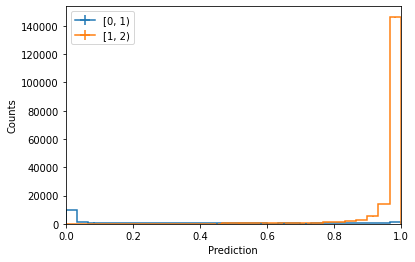

In [57]:
hist.plot1d(outputMC['pred_hist'].sum('dataset'),overlay='flav')

In [58]:
### scale histogram by luminosity ###

# how to fill dataset axis?

### Correlation Matrix

In [61]:
X_test['prediction'] = y_pred
X_test.corr()

,photon_pt,photon_eta,photon_phi,photon_hoe,photon_r9,photon_sieie,photon_pfRelIso03_all,photon_pfRelIso03_chg,deltaR_photon_lepton,deltaR_photon_jet,prediction
photon_pt,1.000000,0.000163,0.003307,-0.102803,0.137112,-0.103887,-0.089590,-0.102230,0.130681,0.197980,0.139000
photon_eta,0.000163,1.000000,-0.008890,-0.002942,0.008571,0.005372,-0.006420,-0.002135,-0.003021,-0.001596,0.000200
photon_phi,0.003307,-0.008890,1.000000,0.007973,-0.001802,0.005568,0.005055,-0.000753,0.009186,0.001332,-0.011305
photon_hoe,-0.102803,-0.002942,0.007973,1.000000,-0.150885,0.365795,0.212785,0.246844,0.035944,-0.007651,-0.400323
photon_r9,0.137112,0.008571,-0.001802,-0.150885,1.000000,-0.119242,0.109080,-0.083627,-0.026954,-0.001749,0.312771
photon_sieie,-0.103887,0.005372,0.005568,0.365795,-0.119242,1.000000,0.390244,0.305420,0.075890,0.047730,-0.807504
photon_pfRelIso03_all,-0.089590,-0.006420,0.005055,0.212785,0.109080,0.390244,1.000000,0.465474,0.068385,-0.006696,-0.472224
photon_pfRelIso03_chg,-0.102230,-0.002135,-0.000753,0.246844,-0.083627,0.305420,0.465474,1.000000,0.067146,-0.043457,-0.407185
deltaR_photon_lepton,0.130681,-0.003021,0.009186,0.035944,-0.026954,0.075890,0.068385,0.067146,1.000000,0.312763,-0.139363
deltaR_photon_jet,0.197980,-0.001596,0.001332,-0.007651,-0.001749,0.047730,-0.006696,-0.043457,0.312763,1.000000,-0.104588


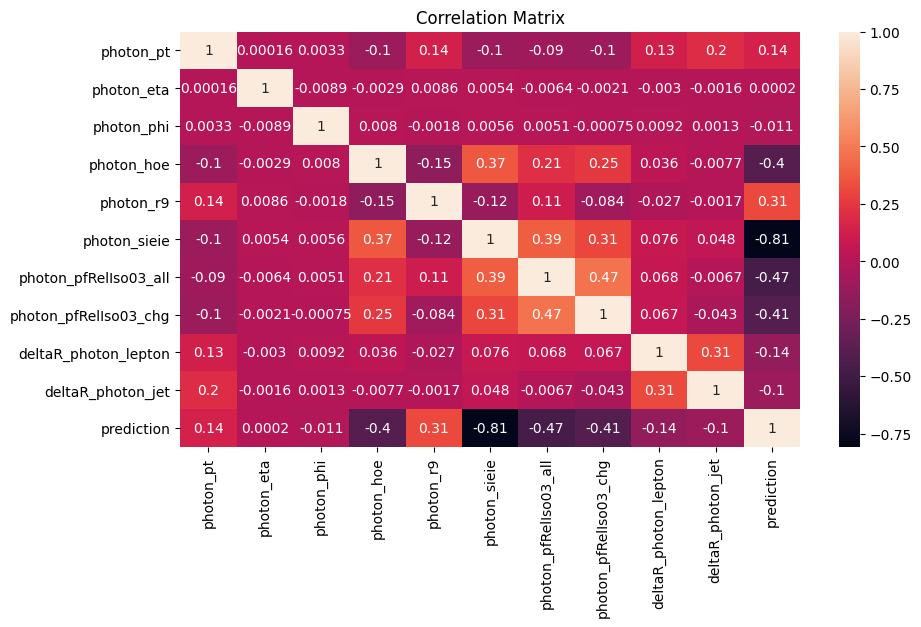

In [62]:
plt.figure(figsize=(10,5.5),dpi=100)
sns.heatmap(X_test.corr(method='pearson'),annot=True)
plt.title('Correlation Matrix')
plt.show()

### Run Model on Data

In [63]:
X_data = pd.DataFrame({
    'photon_pt': np.array(outputData['photon_pt'].value),
    'photon_eta': np.array(outputData['photon_eta'].value),
    'photon_phi': np.array(outputData['photon_phi'].value),
    'photon_hoe': np.array(outputData['photon_hoe'].value),
    'photon_r9': np.array(outputData['photon_r9'].value),
    'photon_sieie': np.array(outputData['photon_sieie'].value),
    'photon_pfRelIso03_all': np.array(outputData['photon_pfRelIso03_all'].value),
    'photon_pfRelIso03_chg': np.array(outputData['photon_pfRelIso03_chg'].value),
    
    'deltaR_photon_lepton': np.array(outputData['deltaR_photon_lepton'].value),
    'deltaR_photon_jet': np.array(outputData['deltaR_photon_jet'].value),
})

X_data.describe()

,photon_pt,photon_eta,photon_phi,photon_hoe,photon_r9,photon_sieie,photon_pfRelIso03_all,photon_pfRelIso03_chg,deltaR_photon_lepton,deltaR_photon_jet
count,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000
mean,50.570145,-0.015870,0.039076,0.019639,0.850088,0.011005,0.177118,0.034467,2.034481,1.057087
std,48.258934,0.754341,1.814194,0.056136,0.263620,0.003260,0.442766,0.088914,0.898282,0.476950
min,20.008158,-1.443848,-3.141602,0.000000,0.205566,0.005196,0.000000,0.000000,0.400251,0.400223
25%,23.618339,-0.625336,-1.500305,0.000000,0.744995,0.008942,0.000000,0.000000,1.280361,0.652916
50%,33.360886,-0.023134,0.002344,0.000000,0.917969,0.009453,0.031615,0.000000,2.123417,0.989416
75%,56.436961,0.590912,1.599121,0.010757,0.961914,0.012686,0.166739,0.031940,2.758509,1.361372
max,513.060974,1.443604,3.141113,0.492188,5.441406,0.026840,6.650416,1.445951,4.548167,3.018653


In [64]:
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)

In [65]:
y_pred_data = model.predict(X_data_scaled)

In [67]:
# fill the `prediction_hist` in `outputData`
# plot MC & Data prediction histograms together



### Compare to MVA ID

In [75]:
predTrue  = y_pred[y_test==1]
predFalse = y_pred[y_test==0]

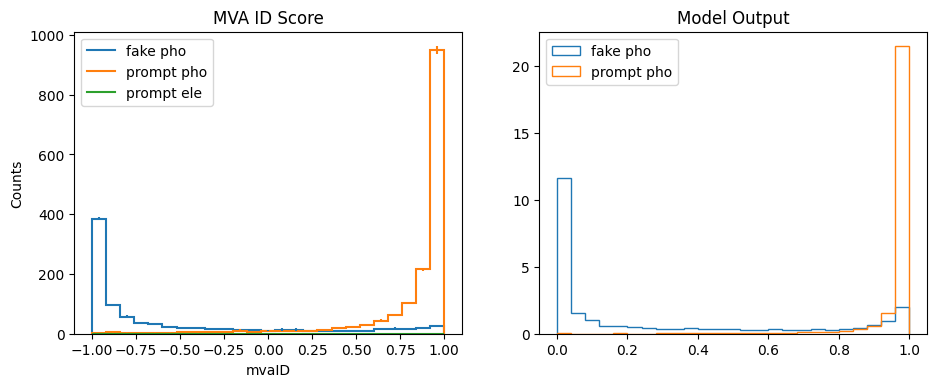

In [81]:
fig, axs = plt.subplots(1,2,figsize=(11,4),dpi=100)

MC_legend_opts = {'loc':'upper left', 'labels': ['fake pho','prompt pho','prompt ele']}
hist.plot1d(outputMC['photon_mvaid_hist'].sum("dataset"),overlay="flav",stack=False,ax=axs[0],legend_opts=MC_legend_opts)
axs[0].set_xlim(-1.1,1.1)

axs[1].hist(predFalse,bins=25,density=True,label='fake pho',histtype='step')
axs[1].hist(predTrue,bins=25,density=True,label='prompt pho',histtype='step')
axs[1].legend(loc="upper left")

axs[0].set_title('MVA ID Score')
axs[1].set_title('Model Output')
plt.show()

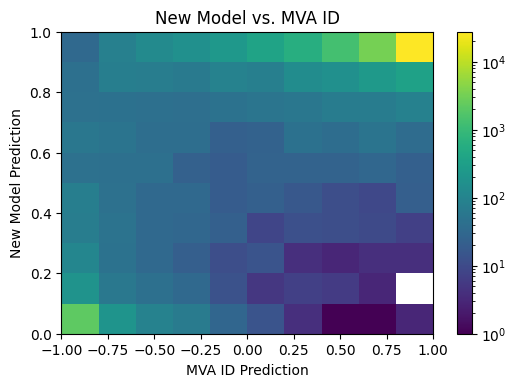

In [82]:
## 2D histograms: new model vs. MVA ID ##
plt.figure(figsize=(6,4),dpi=100)

plt.hist2d(test_mvaID, y_pred.reshape(y_pred.shape[0]),norm=colors.LogNorm())

plt.xlabel('MVA ID Prediction'); plt.xlim(-1,1)
plt.ylabel('New Model Prediction'); plt.ylim(0,1)
plt.title('New Model vs. MVA ID')
plt.colorbar()
plt.show()


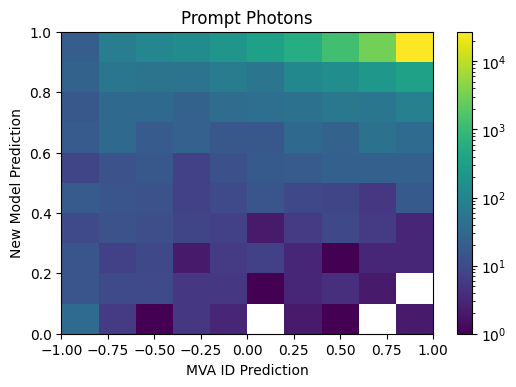

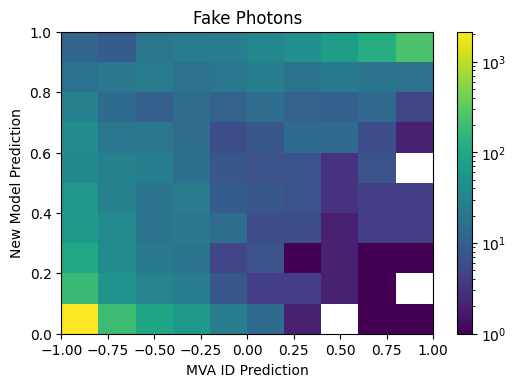

In [83]:
# separate above plot into fake photons and prompt photons

mvaTrue = test_mvaID[y_test==1]
mvaFalse = test_mvaID[y_test==0]

plt.figure(figsize=(6,4),dpi=100)
plt.hist2d(mvaTrue,predTrue.reshape(predTrue.shape[0]),norm=colors.LogNorm())
plt.xlabel('MVA ID Prediction'); plt.ylabel('New Model Prediction')
plt.xlim(-1,1); plt.ylim(0,1)
plt.title('Prompt Photons')
plt.colorbar()
plt.show()

plt.figure(figsize=(6,4),dpi=100)
plt.hist2d(mvaFalse,predFalse.reshape(predFalse.shape[0]),norm=colors.LogNorm())
plt.xlabel('MVA ID Prediction'); plt.ylabel('New Model Prediction')
plt.xlim(-1,1); plt.ylim(0,1)
plt.title('Fake Photons')
plt.colorbar()
plt.show()


In [94]:
### analyze events where model output = 1, MVA ID = -1 ###

mod1_mva0_prompt = X_test[(X_test['prediction']>0.5) & (X_test['mvaID']<0) & (y_test==1)]
mod1_mva0_fake = X_test[(X_test['prediction']>0.5) & (X_test['mvaID']<0) & (y_test==0)]

mod1_mva0_prompt.head()

,photon_pt,photon_eta,photon_phi,photon_hoe,photon_r9,photon_sieie,photon_pfRelIso03_all,photon_pfRelIso03_chg,deltaR_photon_lepton,deltaR_photon_jet,prediction,mvaID
144144,45.397072,1.391357,2.397461,0.000000,0.459961,0.006607,0.041233,0.000000,2.897205,1.362242,0.899559,-0.322266
99184,79.932159,0.969238,-2.295410,0.000000,0.800781,0.009056,0.064440,0.000000,3.049283,0.791613,0.604566,-0.287598
183345,35.964760,1.369873,-1.991699,0.014709,0.966309,0.009346,0.494581,0.388778,2.842268,0.479471,0.854769,-0.104919
158677,21.645460,-0.148193,-0.930298,0.000000,0.922363,0.008934,0.118597,0.011050,1.295582,0.748392,0.868273,-0.091370
101734,23.250731,-1.227051,1.885986,0.000000,0.653320,0.009079,0.120709,0.045186,1.548197,0.559267,0.830425,-0.052216


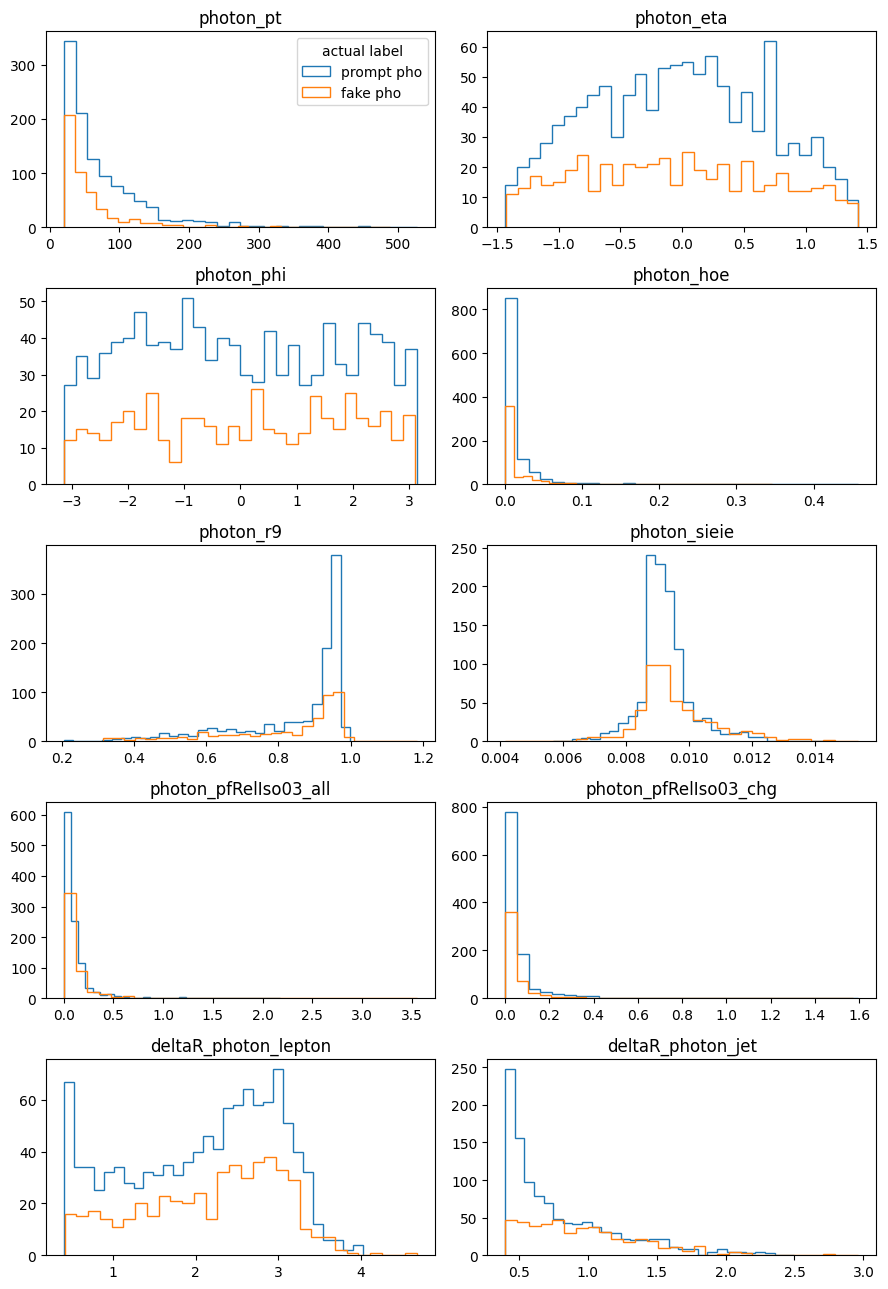

In [108]:
# compare features:
fig, axs = plt.subplots(5,2,figsize=(9,13),dpi=100)

feat = 0
for row in range(5):
    for col in range(2):
        axs[row,col].hist(mod1_mva0_prompt[mod1_mva0_prompt.keys()[feat]],bins=30,histtype="step",label="prompt pho")
        axs[row,col].hist(mod1_mva0_fake[mod1_mva0_prompt.keys()[feat]],bins=30,histtype="step",label="fake pho")
        axs[row,col].set_title(mod1_mva0_prompt.keys()[feat])
        feat = feat+1

axs[0,0].legend(loc="best",title="actual label")
fig.tight_layout()
plt.show()

In [109]:
## ROC curve for MVA ID ##

fprMVA, tprMVA, threshMVA = roc_curve(y_test,test_mvaID)
aucMVA = auc(fprMVA,tprMVA)

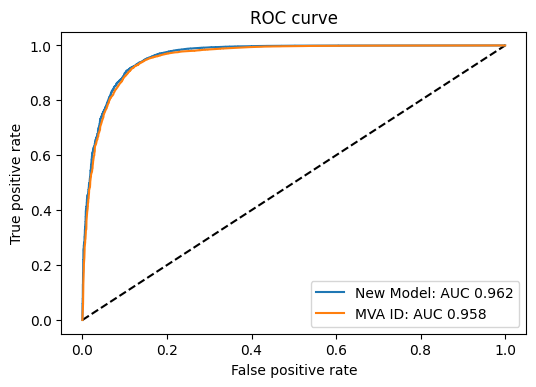

In [110]:
plt.figure(figsize=(6,4),dpi=100)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='New Model: AUC {:.3f}'.format(area_under_curve))
plt.plot(fprMVA, tprMVA, label='MVA ID: AUC {:.3f}'.format(aucMVA))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Analyze Incorrectly-Classified Fake Photons

In [111]:
X_test['target'] = y_test
X_test.head()

,photon_pt,photon_eta,photon_phi,photon_hoe,photon_r9,photon_sieie,photon_pfRelIso03_all,photon_pfRelIso03_chg,deltaR_photon_lepton,deltaR_photon_jet,prediction,mvaID,target
141622,49.821476,1.235107,1.849121,0.010315,0.662109,0.006912,0.000000,0.000000,2.299997,1.185355,0.986758,0.897461,1
30773,25.885412,-0.846436,0.521851,0.000000,0.987305,0.010445,0.044287,0.044287,3.420487,1.034697,0.939278,0.791992,1
182831,61.586884,-1.420166,1.145508,0.006653,0.377197,0.008934,0.098430,0.086871,2.323130,0.913690,0.289675,-0.963379,0
141559,73.265404,-0.122086,-1.354492,0.000000,0.961914,0.009155,0.000000,0.000000,1.171471,0.711686,0.999464,0.980957,1
28761,20.375998,-0.814575,-0.528564,0.000000,0.709961,0.011757,0.318505,0.000000,1.380137,1.373199,0.016555,-0.854004,0


In [112]:
# incorrectly-classified fake photons:
# target = 0, prediction > 0.5

falseNeg = X_test[(X_test['target'] == 1) & (X_test['prediction'] < 0.5)]
truePos  = X_test[(X_test['target'] == 1) & (X_test['prediction'] > 0.5)]
trueNeg  = X_test[(X_test['target'] == 0) & (X_test['prediction'] < 0.5)]
falsePos = X_test[(X_test['target'] == 0) & (X_test['prediction'] > 0.5)]

In [113]:
# confusion matrix
con_mat = np.array([len(trueNeg),len(falsePos),len(falseNeg),len(truePos)])
con_mat_names = np.array(['True Neg:','False Pos:','False Neg:','True Pos:'])
con_mat_perc = ((con_mat/np.sum(con_mat))*100).round(2)

con_mat.reshape(2,2)

array([[ 3362,  1222],
       [  355, 34923]])

In [114]:
labels = [f"{v1}\n{v2}\n({v3}%)" for v1,v2,v3 in zip(con_mat_names,con_mat,con_mat_perc)]
labels = np.asarray(labels).reshape(2,2)

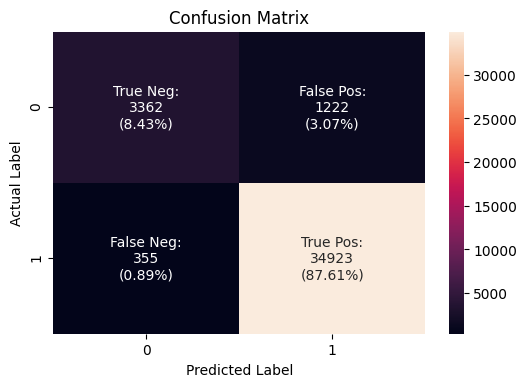

In [115]:
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(con_mat.reshape(2,2),annot=labels,fmt='')
plt.xlabel('Predicted Label'); plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

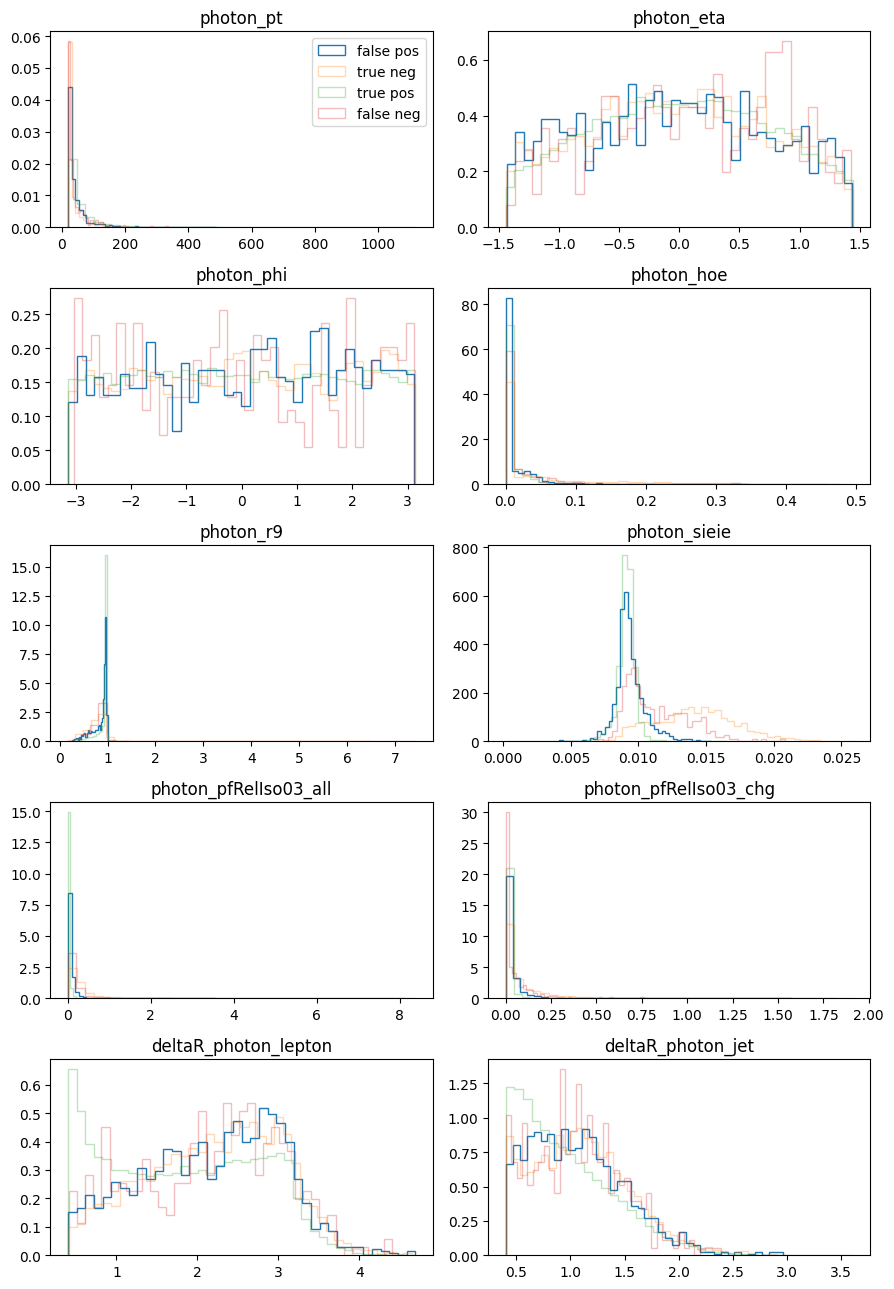

In [116]:
### compare features ###

fig, axs = plt.subplots(5,2,figsize=(9,13),dpi=100)

feat = 0
for row in range(5):
    for col in range(2):
        axs[row,col].hist(falsePos[falsePos.keys()[feat]],bins=40,histtype="step",density=True,label="false pos")
        axs[row,col].hist(trueNeg[falsePos.keys()[feat]],bins=40,histtype="step",alpha=0.3,density=True,label="true neg")
        axs[row,col].hist(truePos[falsePos.keys()[feat]],bins=40,histtype="step",alpha=0.3,density=True,label="true pos")
        axs[row,col].hist(falseNeg[falsePos.keys()[feat]],bins=40,histtype="step",alpha=0.3,density=True,label="false neg")
        
        axs[0,0].legend(loc="best")
        axs[row,col].set_title(falsePos.keys()[feat])
        feat = feat+1

fig.tight_layout()
plt.show()

### Plot ROC curve manually

In [117]:
FPR = []
TPR = []

thresholds = np.linspace(0,1,num=201)

# number of positive (P) and negative (N) samples
P = X_test.target.sum()
N = len(X_test.target) - P

# determine number of true pos & false pos samples for each threshold
for thresh in thresholds:
    FP = 0
    TP = 0
    
    pos = X_test[X_test.prediction>=thresh]
    
    TP = pos.target.sum()
    FP = len(pos.target) - TP
    
    FPR.append(FP/N)
    TPR.append(TP/P)

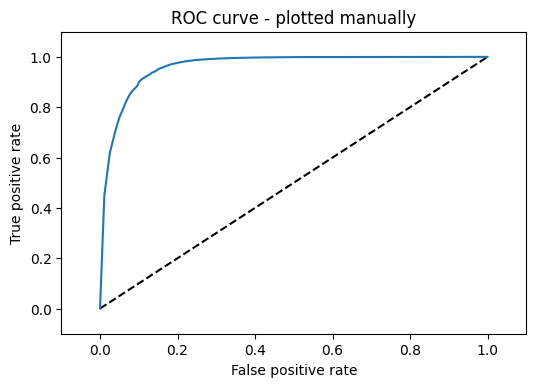

In [118]:
plt.figure(figsize=(6,4),dpi=100)

plt.plot([0,1], [0,1], 'k--')
plt.plot(FPR, TPR)

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - plotted manually')
plt.show()

## try: post-training processor in the same notebook as the model training

Same error:

    TypeError: cannot pickle '_thread.RLock' object

In [119]:
import awkward as ak
import coffea.processor as processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

In [120]:
class PhotonPredictor(processor.ProcessorABC):
    def __init__(self):
        
        self.model = model

        # declare axes
        dataset_axis = hist.Cat("dataset","Dataset")
        flavLabel_axis = hist.Bin("flav",None,[0,1,2])
        photon_genPartFlav_axis = hist.Bin("flav","genPartFlav",14,0,14)
        prediction_axis = hist.Bin("pred","Prediction",30,0,1)
        
        
        # accumulator object: dictionary storing histograms & counters to be filled
        self._accumulator = processor.dict_accumulator({
            'photon_genPartFlav': processor.column_accumulator(np.ndarray(shape=(0,))),
            'prediction': processor.column_accumulator(np.ndarray(shape=(0,))),
            
            'photon_genPartFlav_hist': hist.Hist("Counts", dataset_axis, photon_genPartFlav_axis),
            'prediction_hist': hist.Hist("Counts", dataset_axis, flavLabel_axis, prediction_axis),
        })

    @property
    def accumulator(self):
        return self._accumulator
    
    
    def process(self, events):
        
        output = self.accumulator.identity()
        dataset = events.metadata['dataset']
        
        ######## object & event selection ########
        # muons
        muons=events.Muon
        muonSelectTight = ((muons.pt>30) &
                           (abs(muons.eta)<2.4) &
                           (muons.tightId) &
                           (muons.pfRelIso04_all < 0.15)
                          )
        tightMuons = muons[muonSelectTight]
        
        # jets & b-tagged jets
        jets=events.Jet
        jetSelectTight = ((jets.pt>30) &
                          (abs(jets.eta)<2.4) &
                          (jets.isTight)
                         )
        btaggedJetSelect = (jetSelectTight &
                           (jets.btagDeepB>0.6321)
                          )
        tightJets = jets[jetSelectTight]
        tightBJets = jets[btaggedJetSelect]
        
        # electrons
        electrons=events.Electron
        electronSelectTight = ((electrons.pt> 35) &
                               (abs(electrons.eta)<2.1) &
                               electrons.cutBased>=4 # tight cut-based ID
                              )
        tightEle = electrons[electronSelectTight]
        
        
        # delta R cuts
        phoMu, phoMuDR = events.Photon.nearest(tightMuons,return_metric=True)
        phoMuMask = ak.fill_none(phoMuDR>0.4,True)
        
        phoJet, phoJetDR = events.Photon.nearest(tightJets,return_metric=True)
        phoJetMask = ak.fill_none(phoJetDR>0.4,True)
        
        
        # photons
        photons = events.Photon
        photonSelect= ((photons.pt>20) &
                       (abs(photons.eta) < 1.4442) &
                       (photons.isScEtaEE | photons.isScEtaEB) &
                       (photons.electronVeto) & 
                       np.invert(photons.pixelSeed) &
                       phoMuMask & phoJetMask
                       )
        tightPhotons = photons[photonSelect]
        
        tightPhoMu, tightPhoMuDR = tightPhotons.nearest(tightMuons,return_metric=True)
        tightPhoJet, tightPhoJetDR = tightPhotons.nearest(tightJets,return_metric=True)
        
        
        # events
        trigger = events.HLT.IsoMu24 | events.HLT.IsoTkMu24
        
        eventSelection = (trigger &
                          (ak.num(tightMuons)==1) &
                          (ak.num(tightJets)>=4) & 
                          (ak.num(tightBJets)>=1) &
                          (ak.num(tightEle)==0) &
                          (ak.num(tightPhotons)>=1))

        
        ######## fill histograms ########
        flavLabel = ak.to_numpy(ak.flatten(tightPhotons[eventSelection].genPartFlav))
        flavLabel[flavLabel == 13] = 0 # relabel prompt electrons as fake photons
        
        X = pd.DataFrame({
            'photon_pt': ak.to_numpy(ak.flatten(tightPhotons[eventSelection].pt)),
            'photon_eta': ak.to_numpy(ak.flatten(tightPhotons[eventSelection].eta)),
            'photon_phi': ak.to_numpy(ak.flatten(tightPhotons[eventSelection].phi)),
            'photon_hoe': ak.to_numpy(ak.flatten(tightPhotons[eventSelection].hoe)),
            'photon_r9': ak.to_numpy(ak.flatten(tightPhotons[eventSelection].r9)),
            'photon_sieie': ak.to_numpy(ak.flatten(tightPhotons[eventSelection].sieie)),
            'photon_pfRelIso03_all': ak.to_numpy(ak.flatten(tightPhotons[eventSelection].pfRelIso03_all)),
            'photon_pfRelIso03_chg': ak.to_numpy(ak.flatten(tightPhotons[eventSelection].pfRelIso03_chg)),
            'deltaR_photon_lepton': ak.to_numpy(ak.flatten(tightPhoMuDR[eventSelection])),
            'deltaR_photon_jet': ak.to_numpy(ak.flatten(tightPhoJetDR[eventSelection])),
        })
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        #print(ak.to_numpy(ak.flatten(tightPhotons[eventSelection].genPartFlav)).shape, X.shape)
        
        #y = model.predict(X_scaled)
        
        #output['photon_genPartFlav_hist'].fill(dataset=dataset,
        #                                       flav=ak.to_numpy(ak.flatten(tightPhotons[eventSelection].genPartFlav)))
        #output['prediction_hist'].fill(dataset=dataset, flav=flavLabel,
        #                               pred=y.reshape(y.shape[0],))
        
        ######## fill column accumulators ########
        #output['photon_genPartFlav'] = processor.column_accumulator(ak.to_numpy(ak.flatten(tightPhotons.genPartFlav[eventSelection])))
        #output['prediction'] = processor.column_accumulator(y.reshape(y.shape[0],))
        
        return output
    
    def postprocess(self, accumulator):
        return accumulator

In [121]:
# Define files to run over
skimDir="/udrive/staff/dnoonan/Skims"

fileset = {"TTGamma":[f"{skimDir}/TTGamma_SingleLept_2016_skim.root"],
           "TTbar":[f"{skimDir}/TTbarPowheg_Semilept_2016_skim_1of10.root",
                    f"{skimDir}/TTbarPowheg_Semilept_2016_skim_2of10.root"]
          }
filesetData = {"DataMu":[f"{skimDir}/Data_SingleMu_b_2016_skim_1of10.root"]
              }

In [122]:
np.warnings.filterwarnings('ignore')

# The NanoAODSchema needs to be adjusted, to remove cross references to FSRPhotons
class SkimmedSchema(NanoAODSchema):
    def __init__(self, base_form):
        base_form["contents"].pop("Muon_fsrPhotonIdx", None)
        super().__init__(base_form)

In [123]:
# Run Coffea code using uproot

outputMC_PostTraining = processor.run_uproot_job(
    fileset,
    "Events",
    PhotonPredictor(),
    processor.iterative_executor,
    executor_args={"schema": SkimmedSchema},
    chunksize=100000,
    maxchunks=3,
)

TypeError: cannot pickle '_thread.RLock' object